<a href="https://colab.research.google.com/github/alscop/ESAA-25-2/blob/main/YB_0919(1)_exercises_chipotle_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

In [1]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Step 3. Assign it to a variable called chipo.

In [16]:
chipo = pd.read_csv(url, sep='	')

### Step 4. See the first 10 entries

In [17]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

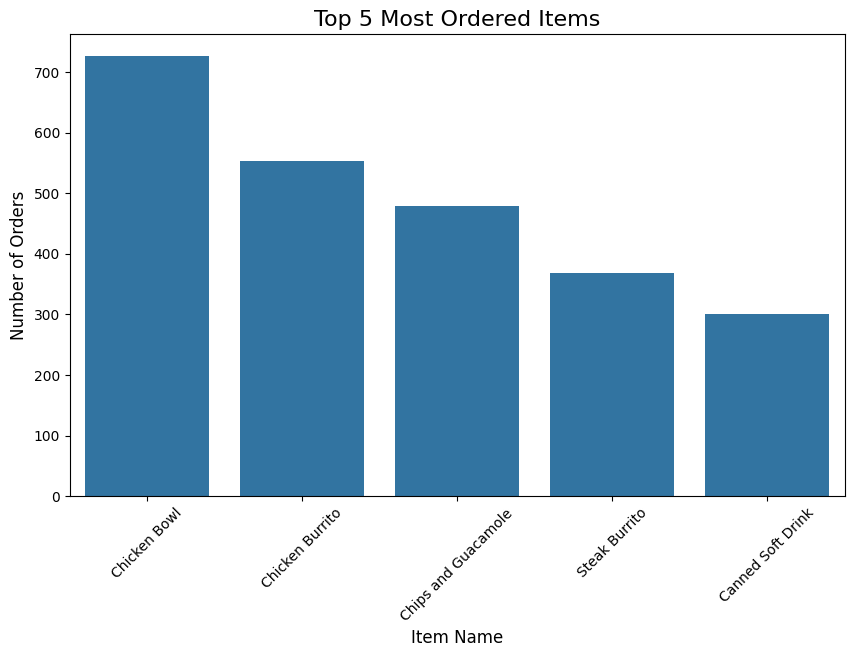

In [22]:
import seaborn as sns

item_counts = chipo['item_name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.index, y=item_counts.values)

plt.title('Top 5 Most Ordered Items', fontsize=16)
plt.xlabel('Item Name', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, fontsize=10) # x축 텍스트 회전 및 정렬

plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

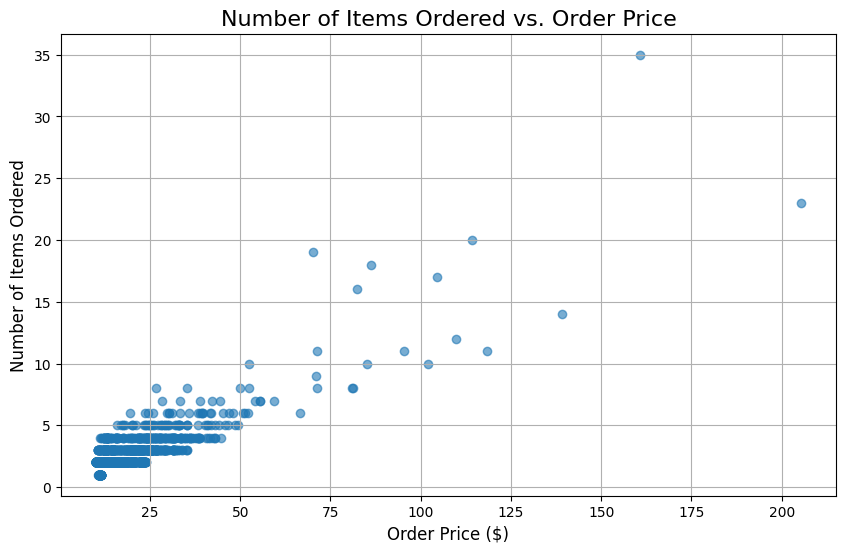

In [28]:
# 'item_price' 컬럼의 $ 기호를 제거하고 실수형으로 변환
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# 'order_id'별로 그룹화하여 주문당 총 가격과 총 품목 수 계산
orders = chipo.groupby('order_id').sum(numeric_only=True)

plt.figure(figsize=(10, 6))
plt.scatter(orders['item_price'], orders['quantity'], alpha=0.6)

plt.title('Number of Items Ordered vs. Order Price', fontsize=16)
plt.xlabel('Order Price ($)', fontsize=12)
plt.ylabel('Number of Items Ordered', fontsize=12)

plt.grid(True)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

가장 높은 수익을 낸 메뉴 top 5 보여주기

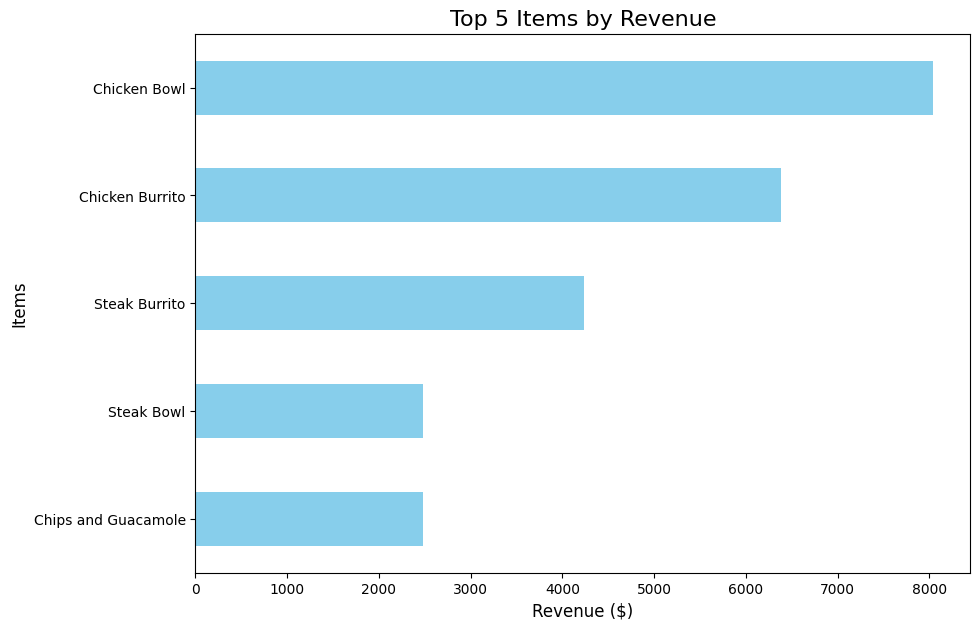

In [30]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']

revenue_by_item = chipo.groupby('item_name')['revenue'].sum()

top_5_revenue = revenue_by_item.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 7))
top_5_revenue.plot(kind='barh', color='skyblue')
plt.title('Top 5 Items by Revenue', fontsize=16)
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Items', fontsize=12)
plt.gca().invert_yaxis()
plt.show()